<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #7d2e00ff, #41180067); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Lab 6 Day 22/8
    </h1>
</div>



<h4 style="color:#b84f13ff">1. Importing Libraries for Visualization, Numerical Computation, File Management, and Deep Learning</h4>

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

<h4 style="color:#b84f13ff">2. Preparing and Loading the Cats vs Dogs Dataset for Training and Validation</h4>

In [48]:
_URL = r'C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day12\Tasks\Task1\cats_and_dogs_filtered'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


<h4 style="color:#b84f13ff">3. Creating the Validation Dataset from Directory</h4>

In [49]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


<h4 style="color:#b84f13ff">4. Visualizing Sample Training Images with Their Class Labels</h4>

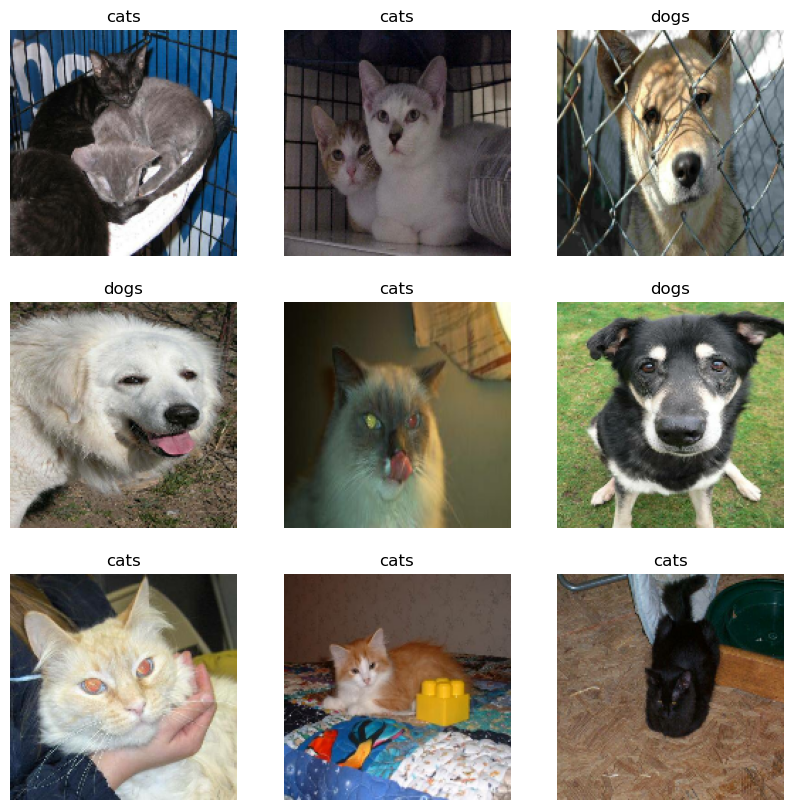

In [50]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

<h4 style="color:#b84f13ff">5. Splitting the Validation Dataset into Validation and Test Sets</h4>


In [51]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

<h4 style="color:#b84f13ff">6. Displaying the Number of Batches in Validation and Test Sets</h4>

In [52]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


<h4 style="color:#b84f13ff">7. Optimizing Dataset Loading with Prefetching</h4>

In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

<h4 style="color:#b84f13ff">8. Defining a Data Augmentation Pipeline</h4>

In [54]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

<h4 style="color:#b84f13ff">9. Visualizing Augmented Versions of a Sample Image</h4>

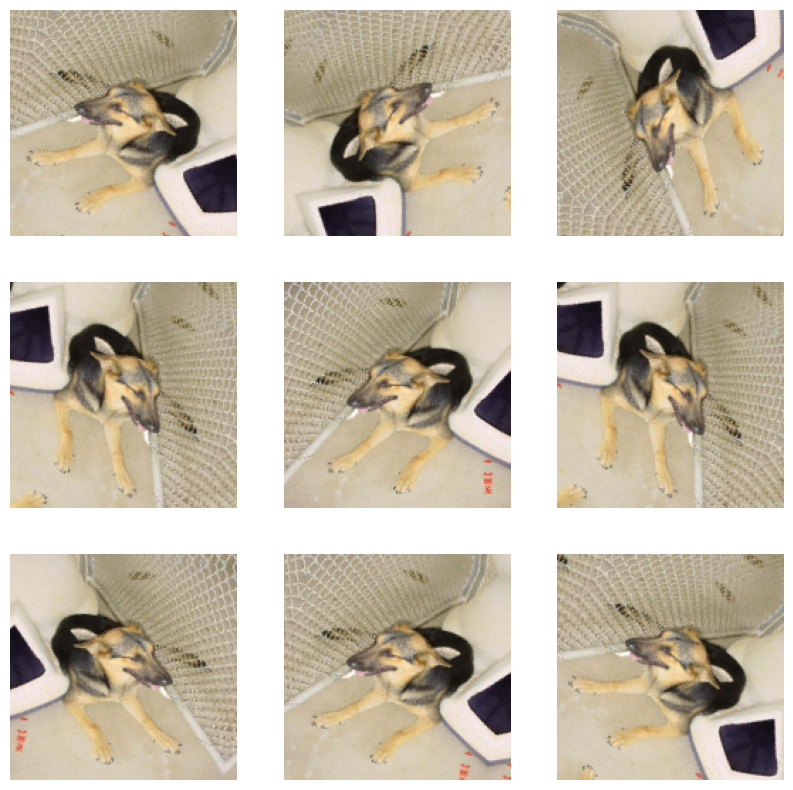

In [55]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

<h4 style="color:#b84f13ff">10. Setting Up Preprocessing Function for MobileNetV2</h4>


In [56]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

<h4 style="color:#b84f13ff">11. Defining a Rescaling Layer for Normalizing Image Pixels</h4>

In [57]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

<h4 style="color:#b84f13ff">12. Loading the Pre-trained MobileNetV2 Model without the Top Layers</h4>

In [58]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                            include_top=False,
                                            weights='imagenet')

<h4 style="color:#b84f13ff">13. Extracting Feature Maps from Images Using the Base Model</h4>

In [59]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


<h4 style="color:#b84f13ff">14. Freezing the Base Model and Displaying Its Architecture</h4>

In [60]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

<h4 style="color:#b84f13ff">15. Applying Global Average Pooling to Extract Feature Vectors</h4>

In [61]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


<h4 style="color:#b84f13ff">16. Adding a Dense Prediction Layer for Binary Classification</h4>

In [62]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


<h4 style="color:#b84f13ff">17. Building the Final Transfer Learning Model Architecture</h4>

In [63]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

<h4 style="color:#b84f13ff">18. Compiling the Model with Optimizer, Loss Function, and Accuracy Metric</h4>

In [64]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])

<h4 style="color:#b84f13ff">19. Checking Trainable Parameters and Summarizing the Model</h4>

In [65]:
len(model.trainable_variables)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

<h4 style="color:#b84f13ff">20. Evaluating the Model on the Validation Set Before Training</h4>

In [66]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.6708 - loss: 0.6566


<h4 style="color:#b84f13ff">21. Displaying the Initial Loss and Accuracy Values</h4>

In [67]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.66
initial accuracy: 0.67


<h4 style="color:#b84f13ff">22. Training the Model with Training and Validation Datasets</h4>

In [68]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.6720 - loss: 0.6094 - val_accuracy: 0.7871 - val_loss: 0.4342
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 294ms/step - accuracy: 0.7665 - loss: 0.4649 - val_accuracy: 0.8502 - val_loss: 0.3271
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.8090 - loss: 0.3872 - val_accuracy: 0.8998 - val_loss: 0.2493
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 0.8470 - loss: 0.3281 - val_accuracy: 0.9208 - val_loss: 0.2113
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - accuracy: 0.8720 - loss: 0.2862 - val_accuracy: 0.9394 - val_loss: 0.1837
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.8840 - loss: 0.2642 - val_accuracy: 0.9530 - val_loss: 0.1533
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.8900 - loss: 0.2526 - val_accuracy: 0.9505 - val_loss: 0.1488
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.9135 - loss: 0.2182 - val_accu

<h4 style="color:#b84f13ff">23. Visualizing Training and Validation Accuracy and Loss over Epochs</h4>

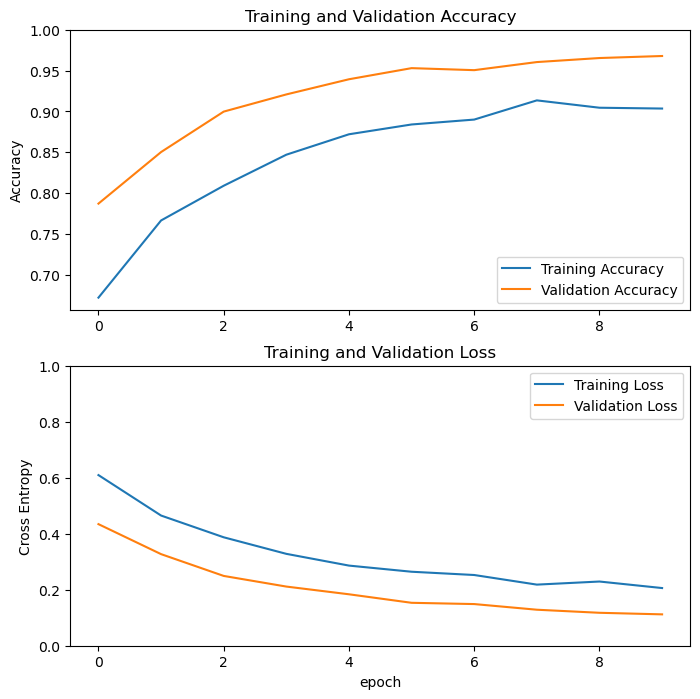

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

<h4 style="color:#b84f13ff">24. Unfreezing the Base Model and Setting Fine-Tuning Starting Point</h4>

In [70]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


<h4 style="color:#b84f13ff">25. Recompiling the Model for Fine-Tuning with a Lower Learning Rate</h4>

In [71]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,862,721 (7.11 MB)

 Non-trainable params: 396,544 (1.51 MB)

<h4 style="color:#b84f13ff">26. Checking the Number of Trainable Variables After Fine-Tuning Setup</h4>

In [72]:
len(model.trainable_variables)

56

<h4 style="color:#b84f13ff">27. Fine-Tuning the Model with Additional Training Epochs</h4>

In [73]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,epochs=total_epochs,initial_epoch=history.epoch[-1],validation_data=validation_dataset)

Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 480ms/step - accuracy: 0.8620 - loss: 0.3458 - val_accuracy: 0.9827 - val_loss: 0.0744
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.8840 - loss: 0.2737 - val_accuracy: 0.9889 - val_loss: 0.0603
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.9190 - loss: 0.2044 - val_accuracy: 0.9876 - val_loss: 0.0547
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - accuracy: 0.9170 - loss: 0.1926 - val_accuracy: 0.9864 - val_loss: 0.0500
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9310 - loss: 0.1648 - val_accuracy: 0.9901 - val_loss: 0.0464
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9360 - loss: 0.1496 - val_accuracy: 0.9926 - val_loss: 0.0365
Epoch 16/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.9425 - loss: 0.1439 - val_accuracy: 0.9889 - val_loss: 0.0407
Epoch 17/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.9490 - loss: 0.1258 - 

<h4 style="color:#b84f13ff">28. Updating Accuracy and Loss Lists with Fine-Tuning Results</h4>

In [74]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

<h4 style="color:#b84f13ff">29. Visualizing Accuracy and Loss Curves Before and After Fine-Tuning</h4>

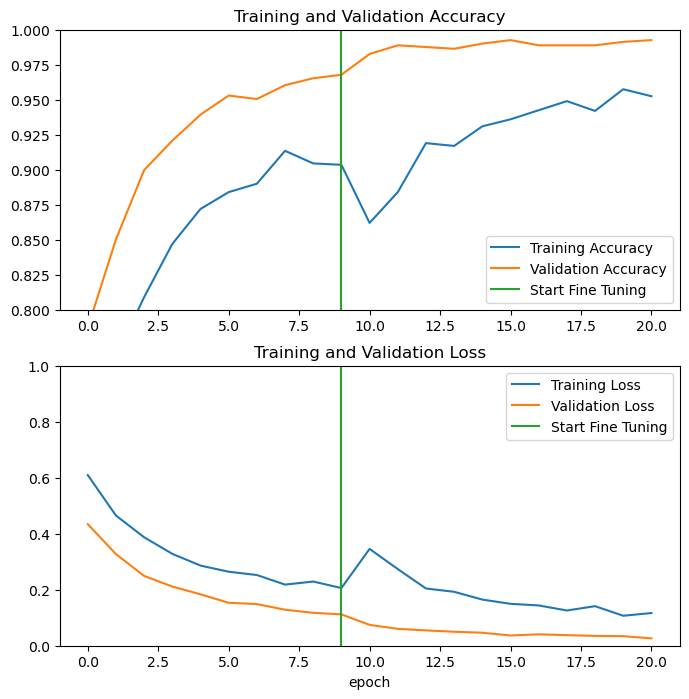

In [75]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

<h4 style="color:#b84f13ff">30. Evaluating the Model Performance on the Test Set</h4>

In [76]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.9896 - loss: 0.0294
Test accuracy : 0.9895833134651184


<h4 style="color:#b84f13ff">31. Making Predictions on Test Images and Visualizing Results</h4>

Predictions:
 [1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1]
Labels:
 [1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1]


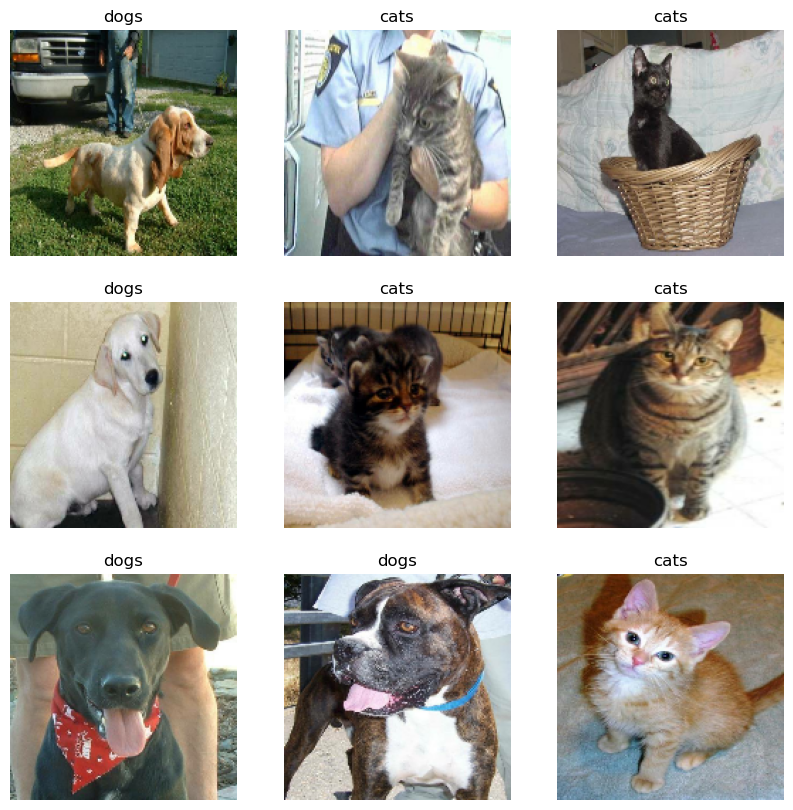

In [77]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")